In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#Library to load Dataset
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Library for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
#Library for measuring accuracy
from sklearn.metrics import accuracy_score 
#Library to shuffle the Dataset
from sklearn.utils import shuffle

In [3]:
#Loading the Dataset3
data_3 = pd.read_csv("/content/PRSA_data_2010.1.1-2014.12.31.csv")
print(data_3.head())

   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0


In [4]:
#Printing the Data
print(data_3.shape)
print(data_3['pm2.5'].describe())
print(data_3.dtypes)

(43824, 13)
count    41757.000000
mean        98.613215
std         92.050387
min          0.000000
25%         29.000000
50%         72.000000
75%        137.000000
max        994.000000
Name: pm2.5, dtype: float64
No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object


In [5]:
#Delete the NO Column
del data_3["No"]
data_3.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [6]:
#Finding the Null columns
null_columns = data_3.columns[data_3.isnull().any()]
print(null_columns)
print(data_3.isnull().sum()) 
print(data_3[data_3.isnull().any(axis=1)][null_columns])

Index(['pm2.5'], dtype='object')
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64
       pm2.5
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
...      ...
43548    NaN
43549    NaN
43550    NaN
43551    NaN
43552    NaN

[2067 rows x 1 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


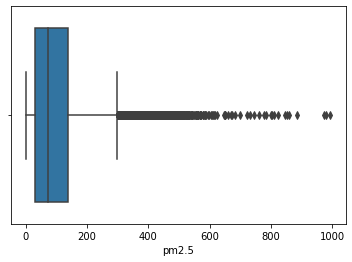

In [7]:
#Plotting pm2.5 to check to how to replace Null values with 
sns.boxplot(data_3['pm2.5'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


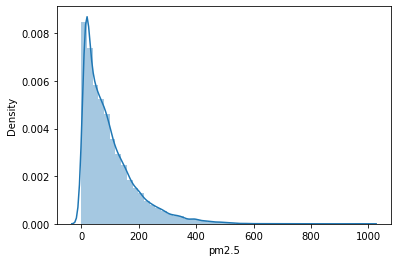

In [8]:
#Plotting pm2.5 to check to how to replace Null values with 
sns.distplot(data_3['pm2.5'])

In [9]:
#Find Median
median = data_3['pm2.5'].median()
print(median)

72.0


In [10]:
#Replacing Null values with median value since the data is skewed
data_3['pm2.5'] = data_3['pm2.5'].fillna(data_3['pm2.5'].median())
print(data_3.isnull().sum()) 

year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64


In [22]:
#Shuffle the Dataset
data_3 = data_3.sample(frac=1)
print(data_3)

       year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
2360   2010      4    9     8   62.0     0  13.0  1012.0   NE  22.35   0   0
42289  2014     10   29     1  101.0     5   8.0  1025.0   cv   0.89   0   0
26606  2013      1   13    14   72.0    -5   0.0  1023.0   SE   1.79   0   0
16094  2011     11    2    14   32.0     0  15.0  1028.0   cv   0.89   0   0
31009  2013      7   16     1   60.0    23  24.0   996.0   cv   1.78   0   0
...     ...    ...  ...   ...    ...   ...   ...     ...  ...    ...  ..  ..
4237   2010      6   26    13  150.0    17  30.0  1006.0   SE   8.05   0   0
21271  2012      6    5     7   87.0    15  23.0  1005.0   NW  11.62   0   0
3272   2010      5   17     8   53.0    13  14.0  1011.0   SE   1.79   0   0
20591  2012      5    7    23   84.0    -1  21.0  1006.0   SE   9.84   0   0
25051  2012     11    9    19  105.0     3   6.0  1025.0   NE   0.89   0   0

[43824 rows x 12 columns]


In [23]:
#Storing the data x and the target='month' values of the Dataset
target = data_3['month']
data_x = data_3.drop(["month"],axis=1)

In [24]:
#Encoding the cbwd column with NW as 0, cv as 1, NE as 2, and SE as 3
data_x.cbwd[data_x.cbwd == 'NW'] = 0
data_x.cbwd[data_x.cbwd == 'cv'] = 1
data_x.cbwd[data_x.cbwd == 'NE'] = 2
data_x.cbwd[data_x.cbwd == 'SE'] = 3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [25]:
print(data_x.head())

       year  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
2360   2010    9     8   62.0     0  13.0  1012.0    2  22.35   0   0
42289  2014   29     1  101.0     5   8.0  1025.0    1   0.89   0   0
26606  2013   13    14   72.0    -5   0.0  1023.0    3   1.79   0   0
16094  2011    2    14   32.0     0  15.0  1028.0    1   0.89   0   0
31009  2013   16     1   60.0    23  24.0   996.0    1   1.78   0   0


In [26]:
#Function to implement the split the data into train and test data
def split_train_test(data_x,data_y,percentage,total):
  split_size = int((percentage*total)/100)
  x_train = data_x[0:split_size]
  x_test = data_x[split_size:total]
  y_train = data_y[0:split_size]
  y_test = data_y[split_size:total]
  return x_train,x_test,y_train,y_test

In [27]:
#Function to find accuracy
def find_accuracy(y_predict,y_test,n):
  true_positive = 0
  false_negative = 0
  for i in range(0,n):
    #Finding the true matched values
    true_positive = true_positive + int(y_predict[i] == y_test[i])
    #Finding the unmatched values
    false_negative = false_negative + int(y_predict[i] != y_test[i])
    #Finding total values
    total = true_positive + false_negative
    #Find the accuracy
    accuracy = true_positive/total
    accuracy = accuracy*100
  return accuracy

In [28]:
#Splitting the dataset in to 80:20
x_train,x_test,y_train,y_test = split_train_test(data_x,target,80,43824)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(35059, 11)
(8765, 11)
(35059,)
(8765,)


In [29]:
def Q3_a(x_train,x_test,y_train,y_test):
  #Applying the gini model
  model_gini = DecisionTreeClassifier(criterion = 'gini')
  model_gini.fit(x_train,y_train)
  predict_gini = model_gini.predict(x_test)
  #Applying the entropy model
  model_entropy = DecisionTreeClassifier(criterion = 'entropy')
  model_entropy.fit(x_train,y_train)
  predict_entropy = model_entropy.predict(x_test)
  #Finding the accuracy of both the models
  accuracy_gini = find_accuracy(predict_gini,y_test.tolist(),y_test.size)
  accuracy_entropy = find_accuracy(predict_entropy,y_test.tolist(),y_test.size)
  print("Accuracy of Model using Gini ", accuracy_gini)
  print("Accuracy of Model using Entropy ", accuracy_entropy)
Q3_a(x_train,x_test,y_train,y_test)

Accuracy of Model using Gini  83.01197946377638
Accuracy of Model using Entropy  84.312606959498


Best Value of Depth by testing accuracy 30
Best Value of Depth by training accuracy 30


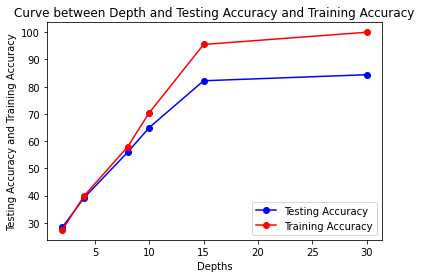

In [30]:
def Q3_b(x_train,x_test,y_train,y_test):
  #Depths to be tried
  depths = [2,4,8,10,15,30]
  #Storing the test and train accuracy
  test_accuracy = []
  train_accuracy = []
  #Iterate over depths
  for depth in depths:
    #Decision Tree classifier for predicting on testing data
    model_test = DecisionTreeClassifier(criterion = 'entropy',max_depth=depth)
    model_test.fit(x_train,y_train)
    predict_test = model_test.predict(x_test)
    #Decision Tree classifier for predicting on training data
    predict_train = model_test.predict(x_train)
    #Finding both test and train accuracy
    test_accuracy.append(find_accuracy(predict_test,y_test.tolist(),y_test.size))
    train_accuracy.append(find_accuracy(predict_train,y_train.tolist(),y_train.size))
  #Best value of Depth with maximum accuracy
  print('Best Value of Depth by testing accuracy', depths[test_accuracy.index(max(test_accuracy))])
  print('Best Value of Depth by training accuracy', depths[train_accuracy.index(max(train_accuracy))])
  #Plot the Depth and Testing Accuracy and Training Accuracy
  plt.plot(depths,test_accuracy,marker='o',color='b',label = 'Testing Accuracy')
  plt.plot(depths,train_accuracy,marker='o',color='r',label = 'Training Accuracy')
  plt.xlabel('Depths')
  plt.ylabel('Testing Accuracy and Training Accuracy')
  plt.title("Curve between Depth and Testing Accuracy and Training Accuracy")
  plt.legend(loc='lower right')
  plt.show()
Q3_b(x_train,x_test,y_train,y_test)

In [31]:
#Splitting the Dataset into 50% of the 80% Training Data
X_train,X_test,Y_train,Y_test = split_train_test(x_train,y_train,50,x_train.shape[0])
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
train_data = x_train.copy()
train_data['month'] = y_train.tolist()
print(train_data.shape)

(17529, 11)
(17530, 11)
(17529,)
(17530,)
(35059, 12)


In [32]:
#making the decision stumps
def decision_stumps(trees,depth,train_data,x_test_pred):
  #adding the predicted value after all the decision stumps
  predicted_val = []
  #iterate over all trees
  for i in range(1,trees+1):
    #Shuffle the train data(80%)
    train_data = train_data.sample(frac=1)
    #getting the columns except the target value as x_data
    data_x = train_data.loc[:, train_data.columns != 'month']
    #y_data as the target value which is month
    data_y = train_data['month']
    #splitting the data into 50% from the 80% data
    X_train,X_test,Y_train,Y_test = split_train_test(data_x,data_y,50,data_x.shape[0])
    #Making the decision tree classifier
    model_test = DecisionTreeClassifier(criterion = 'entropy',max_depth = depth)
    model_test.fit(X_train,Y_train)
    predict_test = model_test.predict(x_test_pred)
    #adding the predicted value 
    predicted_val.append(predict_test)
  return predicted_val

In [33]:
def Q3_c(train_data,x_test):
  depth = 3
  trees = 100
  #final predicted value from the majority vote of all decision trees
  final_pred = []
  #Getting the all predicted values from all decision trees
  predicted_data = decision_stumps(trees,depth,train_data,x_test)
  #Finding the majority vote by iterating over predicted values from test datafrom all decision trees
  for i in range(0,x_test.shape[0]):
    list_values = []
    for j in range(0, trees):
      list_values.append(predicted_data[j][i])
    #Finding the mod for each of the respective predicted test value from all decision tree
    list_values.sort()
    values = set(list_values)
    store_mod = dict.fromkeys(values,0)
    key = 0
    for key in store_mod.keys():
      store_mod[key] = list_values.count(key)
    store_mod = dict(sorted(store_mod.items(), key = lambda x : x[1],reverse=True))
    #Storing the majority vote
    final_pred.append(list(store_mod.keys())[0])
  #printing the predicted values of test data
  ensemble_data = pd.DataFrame(list(zip(final_pred,y_test)),columns = ["Predicted Values","Actual Values"])
  #finding accuracy
  accuracy = find_accuracy(final_pred , y_test.tolist() , y_test.shape[0])
  print("The Accuracy is ",accuracy)
  #print(ensemble_data.to_string(index=False))
Q3_c(train_data,x_test)

The Accuracy is  34.27267541357673


In [54]:
#Trying to tune the decision stumps by changing trees and depth to analyse the effect on test data
def testing_3d_data(train_data,x_test):
  #storing the test accuracy
  test_accuracy = []
  #depths and number of trees to try to tune
  depths = [4,8,10,15,20,30]
  trees = [5,10,50,100]
  #Iterate over depths
  for depth in depths:
    print(depth)
    test_accuracy_part = []
    #Iterating over trees for every depth
    for tree in trees:
      final_pred = []
      #Tuning the decision stumps for trees
      predicted_data = decision_stumps(tree,depth,train_data,x_test)
      #Finding the majority vote by iterating over predicted values from test data from all decision trees
      for i in range(0,x_test.shape[0]):
        list_values = []
        for j in range(0, tree):
          list_values.append(predicted_data[j][i])
        #Finding the mod for each of the respective predicted test value from all decision tree
        list_values.sort()
        values = set(list_values)
        store_mod = dict.fromkeys(values,0)
        key = 0
        for key in store_mod.keys():
          store_mod[key] = list_values.count(key)
        store_mod = dict(sorted(store_mod.items(), key = lambda x : x[1],reverse=True))
        #Storing the majority vote
        final_pred.append(list(store_mod.keys())[0])
      test_accuracy_part.append(find_accuracy(final_pred , y_test.tolist() , y_test.shape[0]))
    #finding the accuracy
    test_accuracy.append(test_accuracy_part)
  print("The Test Accuracy is ",test_accuracy)
  return test_accuracy

In [55]:
#Trying to tune the decision stumps by changing trees and depth to analyse the effect on training 80% data
def training_3d_data(train_data,x_train):
  #storing the train accuracy
  train_accuracy = []
  #depths and number of trees to try to tune
  depths = [4,8,10,15,20,30]
  trees = [5,10,50,100]
  #Iterate over depths
  for depth in depths:
    print(depth)
    train_accuracy_part = []
    #Iterating over trees for every depth
    for tree in trees:
      final_pred = []
      #Tuning the decision stumps for trees
      predicted_data = decision_stumps(tree,depth,train_data,x_train)
      #Finding the majority vote by iterating over predicted values from train data from all decision trees
      for i in range(0,x_train.shape[0]):
        list_values = []
        for j in range(0, tree):
          list_values.append(predicted_data[j][i])
        #Finding the mod for each of the respective predicted train value from all decision tree
        list_values.sort()
        values = set(list_values)
        store_mod = dict.fromkeys(values,0)
        key = 0
        for key in store_mod.keys():
          store_mod[key] = list_values.count(key)
        store_mod = dict(sorted(store_mod.items(), key = lambda x : x[1],reverse=True))
        #Storing the majority vote
        final_pred.append(list(store_mod.keys())[0])
      train_accuracy_part.append(find_accuracy(final_pred , y_train.tolist() , y_train.shape[0]))
    #finding the accuracy
    train_accuracy.append(train_accuracy_part)
  print("the train accuracy is", train_accuracy)
  return train_accuracy  

In [56]:
def Q3_d(train_data,x_train,x_test):
  #tuning for the training data
  train_accuracy = training_3d_data(train_data,x_train)
  #tuning for the testing data
  test_accuracy = testing_3d_data(train_data,x_test)
  depths = [4,8,10,15,20,30]
  trees = [5,10,50,100]
  #print the values
  print("Depth, Trees, Train Accuracy, Test Accuracy")
  for i in depths:
    for j in trees:
      print(i,j,train_accuracy[depths.index(i)][trees.index(j)],test_accuracy[depths.index(i)][trees.index(j)])

Q3_d(train_data,x_train,x_test)

4
8
10
15
20
30
the train accuracy is [[40.07530163438774, 40.42613879460338, 40.286374397444305, 40.11238198465444], [61.054222881428444, 62.86830770986052, 64.585413160672, 64.77081491200548], [75.94055734618786, 78.33081377107162, 80.84657291993497, 80.90361961265296], [95.09683676088879, 97.67534727174191, 99.24983599075844, 99.37533871473802], [97.04783365184404, 98.8419521378248, 99.90016828774351, 99.94865797655382], [97.10488034456203, 98.864770814912, 99.90016828774351, 99.95151031118971]]
4
8
10
15
20
30
The Test Accuracy is  [[39.21277809469481, 39.64632059326868, 39.93154592127781, 40.06845407872219], [58.859098687963495, 59.92013690815744, 61.836851112378774, 61.99657729606389], [68.70507701083856, 72.50427837992014, 74.66058185966914, 75.57330290929835], [84.63205932686823, 88.28294352538505, 90.66742726754136, 91.02110667427267], [86.0810039931546, 89.16143753565316, 91.7969195664575, 92.19623502567028], [85.80718767826583, 89.57216200798631, 91.99087278950371, 92.413006